In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import numpy as np
from humanfriendly import format_size, parse_size

In [22]:
named_colors = {
    "black": "#000000",
    "orange": "#e69f00",
    "skyblue": "#56b4e9",
    "bluish green": "#009e73",
    "yellow": "#f0e442",
    "blue": "#0072b2",
    "vermilion": "#d55e00",
    "reddish purple": "#cc79a7",
}
cud_palette = list(named_colors.values())

In [23]:
sns.set_style("whitegrid")
sns.set_palette(cud_palette)

In [24]:
df = pd.read_csv("../results/estimates/estimates.tsv", sep="\t")
df["abs_relative_error"] = df["relative_error"].abs()
# replace values of inifinity with NaN
# df = df.replace([float("inf"), float("-inf")], float("nan"))
df

,asm_accession,organism,taxid,bioproject,biosample,strain,asm_seq_tech,n_chromosomes,true_size,asm_coverage,...,relative_size,relative_error,cpu_time,memory_mb,stats_num_seqs,stats_sum_len,stats_avg_len,stats_median_len,avg_qual,abs_relative_error
0,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,1.041207,4.120716,16.13,31.66,347110.0,1.000001e+09,2880.9,1852.0,16.71,4.120716
1,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,1.046194,4.619425,15.33,35.00,347110.0,1.000001e+09,2880.9,1852.0,16.71,4.619425
2,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,1.187997,18.799683,14.97,379.92,347110.0,1.000001e+09,2880.9,1852.0,16.71,18.799683
3,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,0.942282,-5.771759,45.75,8146.16,347110.0,1.000001e+09,2880.9,1852.0,16.71,5.771759
4,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,0.998984,-0.101596,710.50,15920.59,347110.0,1.000001e+09,2880.9,1852.0,16.71,0.101596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16845,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,1.048079,4.807857,188.18,2911.28,106958.0,1.000007e+09,9349.5,6503.0,9.68,4.807857
16846,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,1.028761,2.876129,15.16,30.34,106958.0,1.000007e+09,9349.5,6503.0,9.68,2.876129
16847,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,2.538313,153.831272,74.76,1439.52,106958.0,1.000007e+09,9349.5,6503.0,9.68,153.831272
16848,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,1.051032,5.103243,46.04,8038.48,106958.0,1.000007e+09,9349.5,6503.0,9.68,5.103243


In [25]:
# check there are no values of infinity
assert not df.isin([float("inf"), float("-inf")]).any().any()

In [26]:
label_mapping = {"OXFORD_NANOPORE": "ONT", "PACBIO_SMRT": "PacBio"}

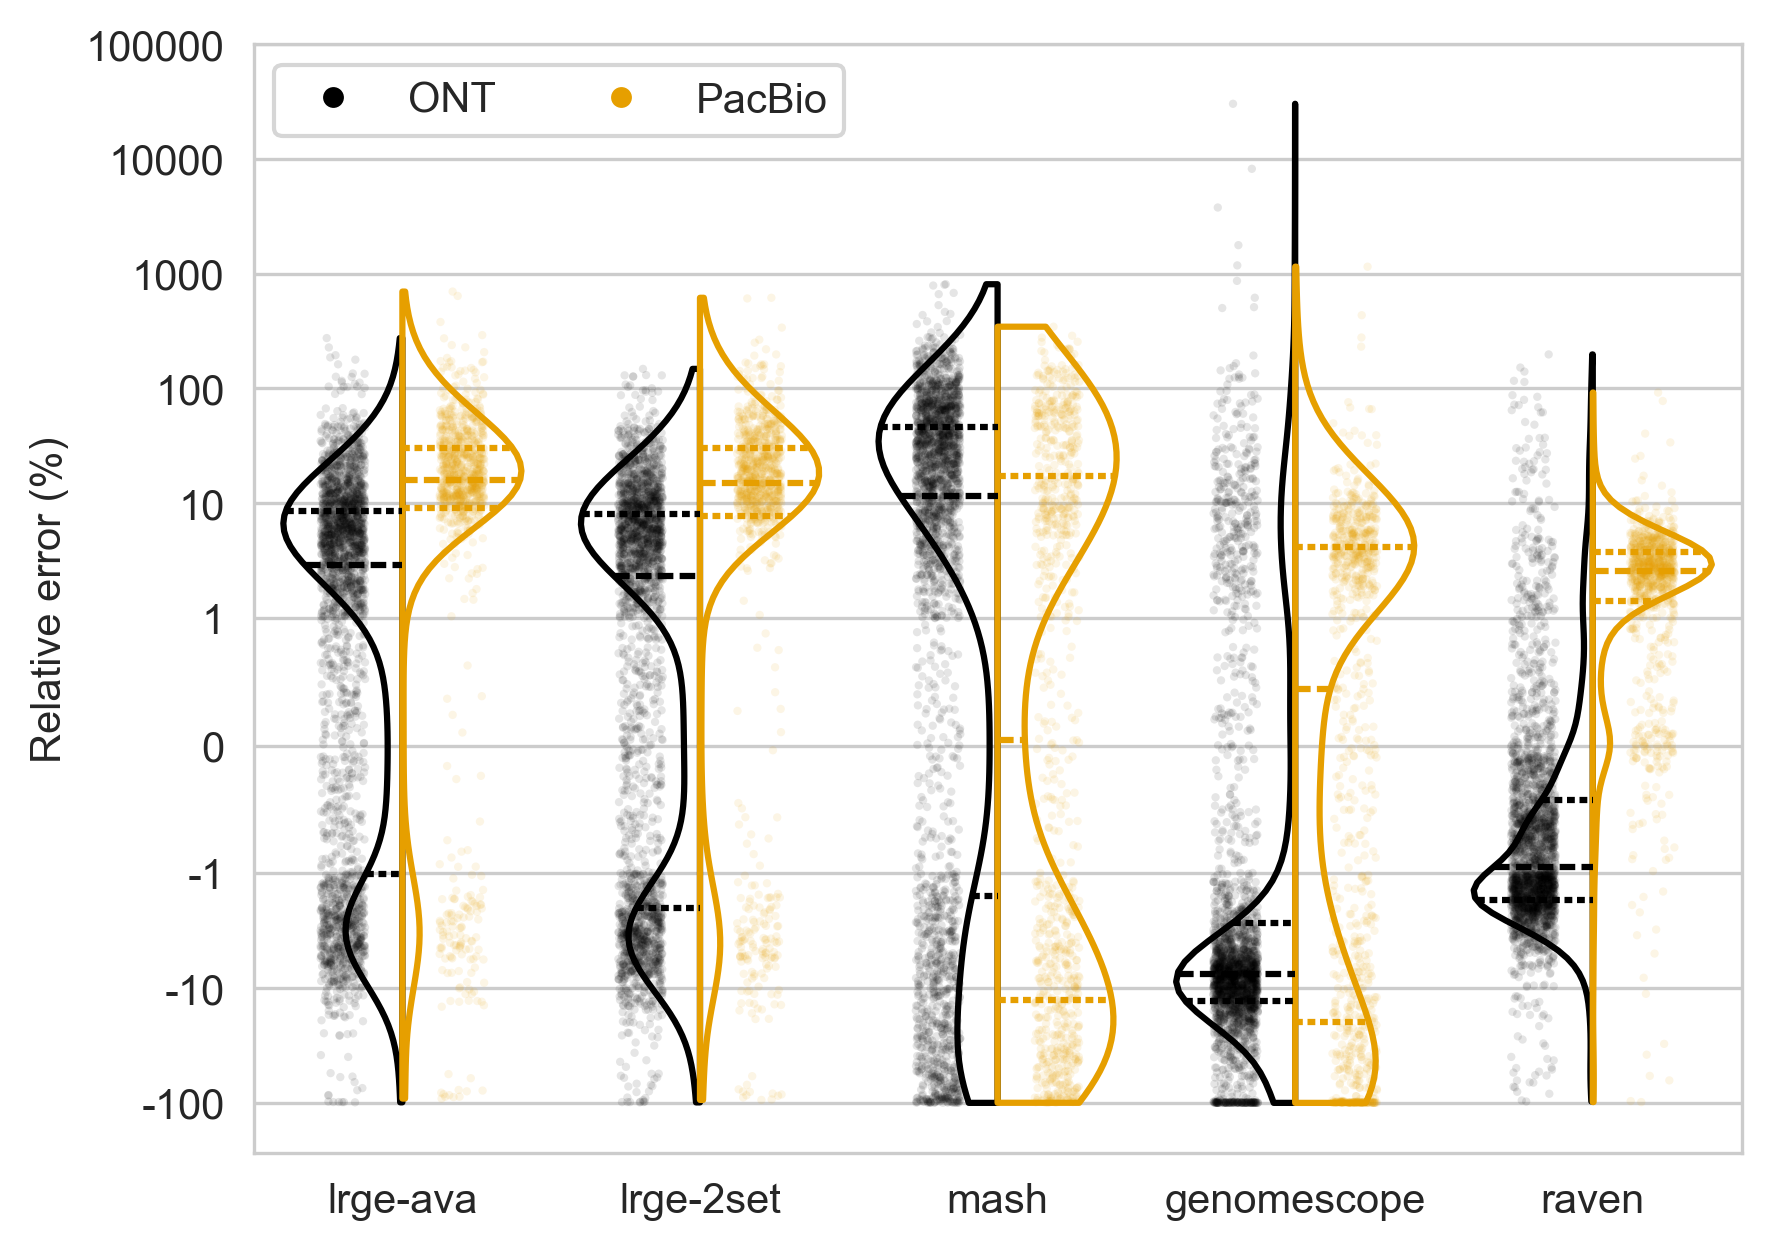

In [27]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "relative_error"
hue = "platform"
data = df
ax.set_yscale("symlog", linthresh=1)
# sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
sns.violinplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1.5,
    density_norm="width",
    legend=False,
    split=True,
    cut=0,
    inner="quart"
)
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.1, jitter=0.15, size=2)

yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlabel("")
ax.set_ylabel("Relative error (%)")

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="best",
    # bbox_to_anchor=(0.5, 0.95),
    ncol=2,
    title="",
    alignment="center",
)

/var/folders/bp/zbbdn_091x1_34h2k7b9nszm0000gn/T/ipykernel_24089/3207729266.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)


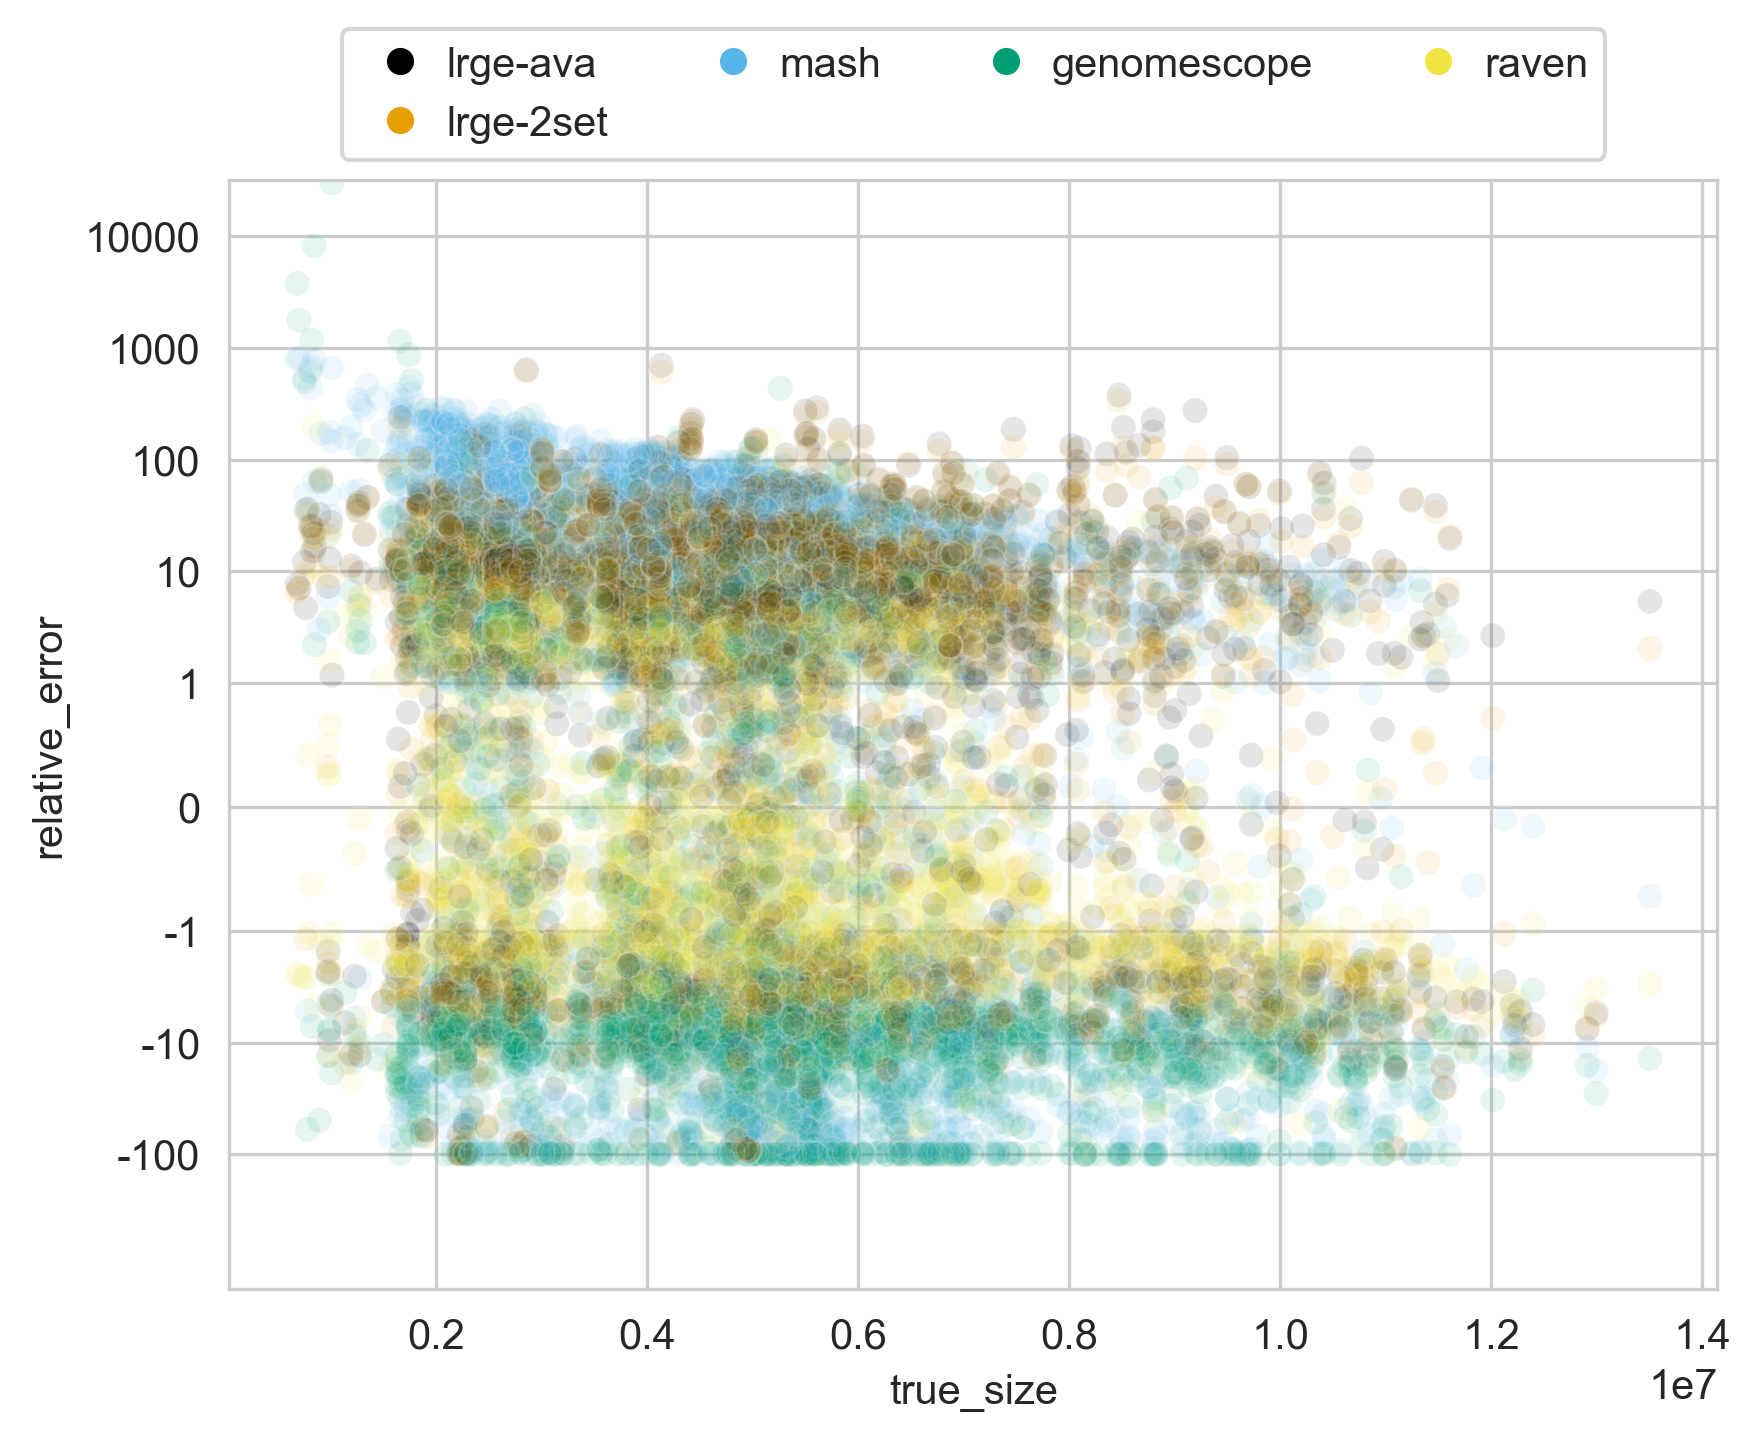

In [28]:
x = "true_size"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(7)
    handle.set_alpha(1)

ax.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=4,
    title="",
    alignment="center",
    handletextpad=0.1,
)

In [29]:
df.groupby(["method", "platform"])["abs_relative_error"].describe()

count       mean         std       min  \
method      platform                                                   
genomescope OXFORD_NANOPORE  2468.0  36.168569  635.663110  0.000967   
            PACBIO_SMRT       902.0  24.489009   52.739505  0.004800   
lrge-2set   OXFORD_NANOPORE  2468.0   8.947624   14.233684  0.001479   
            PACBIO_SMRT       902.0  27.564971   42.493274  0.035692   
lrge-ava    OXFORD_NANOPORE  2468.0   9.192395   16.836791  0.009169   
            PACBIO_SMRT       902.0  28.857118   45.727053  0.103140   
mash        OXFORD_NANOPORE  2468.0  42.500085   59.868421  0.001658   
            PACBIO_SMRT       902.0  35.061845   45.001364  0.008119   
raven       OXFORD_NANOPORE  2468.0   2.901566   10.169220  0.000241   
            PACBIO_SMRT       902.0   3.541189    7.222411  0.000000   

                                  25%        50%        75%           max  
method      platform                                                       
genomescope OXFORD_NANOPORE  4.847736   8.458660  15.227050  30172.362713  
            PACBIO_SMRT      2.465254   5.820301  24.026782   1150.362075  
lrge-2set   OXFORD_NANOPORE  2.170034   4.792069   9.681354    148.153346  
            PACBIO_SMRT      8.830421  15.676714  31.404780    616.541073  
lrge-ava    OXFORD_NANOPORE  1.951392   4.567526   9.762421    274.736154  
            PACBIO_SMRT      9.858501  16.314294  32.319253    698.289555  
mash        OXFORD_NANOPORE  6.525349  24.032816  59.774773    809.126097  
            PACBIO_SMRT      4.345961  15.088962  53.573505    345.128385  
raven       OXFORD_NANOPORE  0.623426   1.120045   1.941028    197.959118  
            PACBIO_SMRT      1.493439   2.636603   3.895880     98.434872

In [30]:
# do an ANOVA to test if the means are different for the different methods on each platform

# this list will contain the results of the Tukey HSD test for those platforms where the ANOVA test is significant
# the format of each element is ((hue, x), (hue, x), pval) where the first two elements are the pairs of means that are
# significantly different and the third element is the p-value of the test
annotations = []

for platform in df["platform"].unique():
    print(f"{'=' * 30}\nPlatform: {platform}\n{'=' * 30}")
    for method in df["method"].unique():
        # print(f"Method: {method}")
        data = df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"]
        # print(data.describe())
    f, p = f_oneway(
        *[df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"] for method in df["method"].unique()]
    )
    print(f"ANOVA: f={f}, p={p}")
    if p < 0.05:
        print("Means are significantly different")
        tukey = pairwise_tukeyhsd(
            df[(df["platform"] == platform)]["abs_relative_error"], df[(df["platform"] == platform)]["method"]
        )
        print(tukey.summary())
        for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
            if not tukey.reject[i]:
                continue
            pval = float(tukey.pvalues[i])
            annotations.append(((tup[0], platform), (tup[1], platform), pval))
    else:
        print("Means are not significantly different")

Platform: OXFORD_NANOPORE
ANOVA: f=9.816104395695014, p=6.318499038232687e-08
Means are significantly different
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2  meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
genomescope lrge-2set -27.2209 0.0073 -49.4125  -5.0293   True
genomescope  lrge-ava -26.9762 0.0081 -49.1678  -4.7846   True
genomescope      mash   6.3315 0.9369 -15.8601  28.5231  False
genomescope     raven  -33.267 0.0004 -55.4586 -11.0754   True
  lrge-2set  lrge-ava   0.2448    1.0 -21.9468  22.4364  False
  lrge-2set      mash  33.5525 0.0004  11.3609  55.7441   True
  lrge-2set     raven  -6.0461 0.9463 -28.2377  16.1455  False
   lrge-ava      mash  33.3077 0.0004  11.1161  55.4993   True
   lrge-ava     raven  -6.2908 0.9383 -28.4824  15.9008  False
       mash     raven -39.5985    0.0 -61.7901 -17.4069   True
--------------------------------------------------------------
Platfo

In [31]:
def pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    else:
        return "ns"

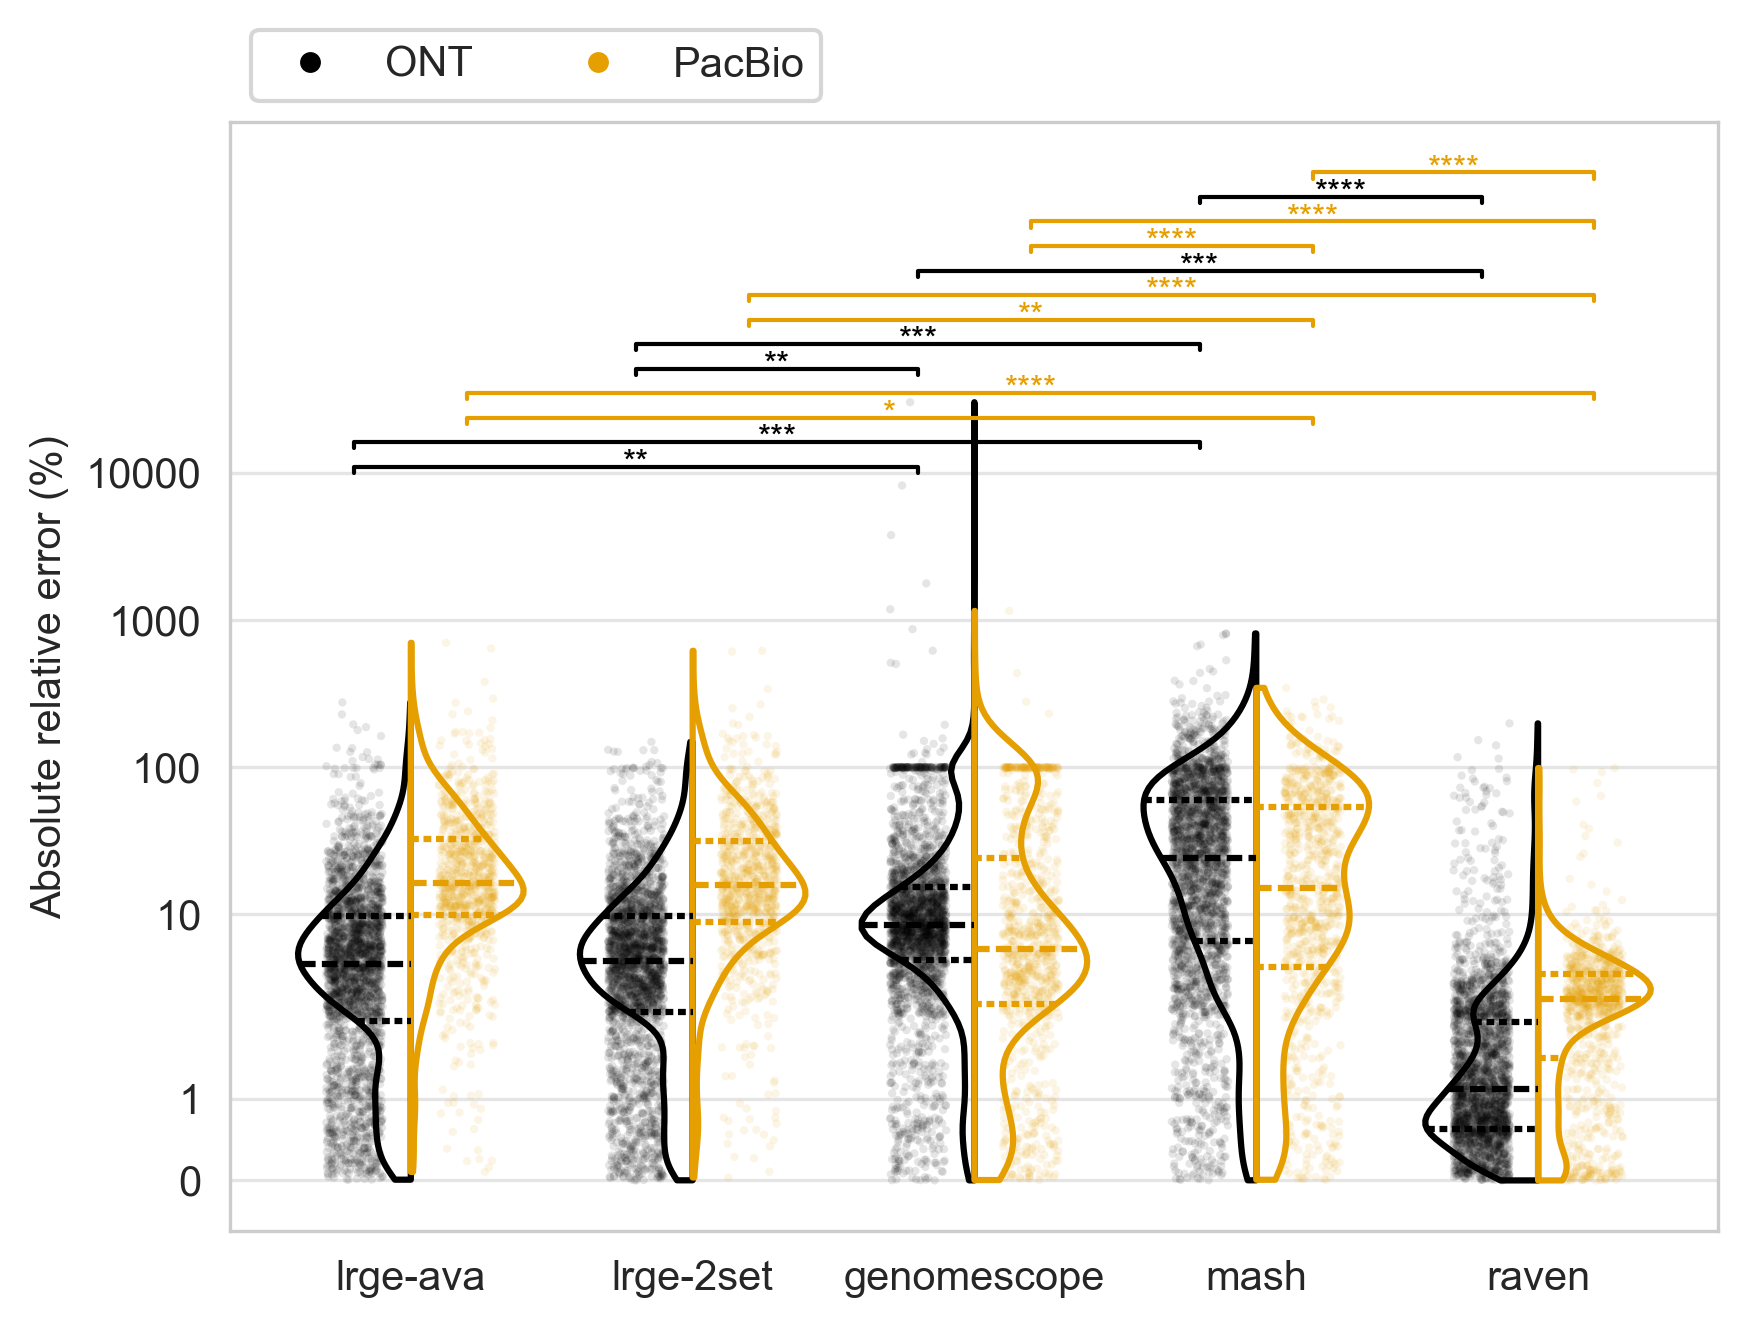

In [32]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = df

order = ["lrge-ava", "lrge-2set", "genomescope", "mash", "raven"]
hue_order = sorted(data[hue].unique())
ax.set_yscale("symlog")
sns.stripplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    dodge=True,
    alpha=0.1,
    jitter=0.2,
    order=order,
    hue_order=hue_order,
    size=2,
)
# sns.boxenplot(
#     x=x,
#     y=y,
#     hue=hue,
#     data=data,
#     ax=ax,
#     fill=False,
#     showfliers=False,
#     gap=0.1,
#     legend=False,
#     order=order,
#     hue_order=hue_order,
# )
sns.violinplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1.5,
    density_norm="width",
    legend=False,
    order=order,
    hue_order=hue_order,
    inner="quart",
    cut=0,
    split=True,
)


yticks = [0, 1, 10, 100, 1000, 10000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# statistical annotations
args = []
for i, ((m1, platform), (m2, _), pval) in enumerate(annotations):
    m1_x = order.index(m1)
    m2_x = order.index(m2)
    platform_ix = hue_order.index(platform)
    offset = -0.2 if platform_ix == 0 else 0.2
    x1, x2 = sorted([m1_x + offset, m2_x + offset])

    col_ix = hue_order.index(platform)
    col = cud_palette[col_ix]
    annot = pvalue_to_asterisks(pval)

    args.append((x1, x2, col, annot))

annot_ys = np.logspace(4, 6, num=len(annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.1 * bracket_y
    ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
        # alpha=0.5
    )
    ax.text((x1 + x2) * 0.5, bracket_y*0.9, annot, ha="center", va="bottom", color=col, fontsize=8)


# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="lower left",
    bbox_to_anchor=(0, 1),
    ncol=2,
    title="",
    alignment="center",
)
ax.set_ylabel("Absolute relative error (%)")
ax.set_xlabel("")
# turn on y-axis grid
ax.yaxis.grid(True)
# increase the transparency of the grid
ax.yaxis.grid(alpha=0.5)

Plot the run time and memory usage

In [33]:
import re

def parse_time(time_str):
    # Define unit multipliers in seconds
    unit_multipliers = {'d': 86400, 'h': 3600, 'm': 60, 's': 1}
    total_seconds = 0

    # Find all matches of the format (number)(unit), e.g., 2m, 1h, 30s
    matches = re.findall(r"(\d+)([dhms])", time_str)
    
    for value, unit in matches:
        # Convert value to int and multiply by the appropriate unit multiplier
        total_seconds += int(value) * unit_multipliers[unit]
    
    return total_seconds

# Examples
print(parse_time("2m"))         # Output: 120
print(parse_time("1m 40s"))     # Output: 100
print(parse_time("1h 1m 1s"))   # Output: 3661
print(parse_time("1d 2h"))      # Output: 93600

def format_time(seconds):
    # Define the time units
    units = [("d", 86400), ("h", 3600), ("m", 60), ("s", 1)]
    parts = []

    # Loop through each time unit
    for unit, divisor in units:
        value, seconds = divmod(seconds, divisor)  # Get unit value and remainder
        if value > 0:
            parts.append(f"{value}{unit}")  # Only add non-zero units

    return " ".join(parts) if parts else "0s"  # Return formatted string

# Examples
print(format_time(120))   # Output: "2m"
print(format_time(100))   # Output: "1m 40s"
print(format_time(3661))  # Output: "1h 1m 1s"


120
100
3661
93600
2m
1m 40s
1h 1m 1s


In [34]:
# normalise the runtime by the number of bases in the input file
df["s/Mbp"] = df["cpu_time"] / (df["stats_sum_len"] / 1e6)

In [35]:
df.groupby(["method", "platform"])["s/Mbp"].describe()

count      mean       std       min       25%  \
method      platform                                                          
genomescope OXFORD_NANOPORE  2468.0  0.057818  0.021443  0.015270  0.045880   
            PACBIO_SMRT       902.0  0.051506  0.014304  0.015230  0.046770   
lrge-2set   OXFORD_NANOPORE  2468.0  0.089529  0.202347  0.012780  0.018559   
            PACBIO_SMRT       902.0  0.051106  0.152131  0.009990  0.015130   
lrge-ava    OXFORD_NANOPORE  2468.0  0.338385  0.578122  0.012910  0.072140   
            PACBIO_SMRT       902.0  0.220791  0.591511  0.008860  0.020892   
mash        OXFORD_NANOPORE  2468.0  0.062425  0.055808  0.014790  0.029557   
            PACBIO_SMRT       902.0  0.147707  0.111943  0.015010  0.074840   
raven       OXFORD_NANOPORE  2468.0  0.281589  0.156902  0.053859  0.181831   
            PACBIO_SMRT       902.0  0.240847  0.240756  0.046190  0.139473   

                                  50%       75%       max  
method      platform                                       
genomescope OXFORD_NANOPORE  0.052273  0.069749  0.178472  
            PACBIO_SMRT      0.048195  0.052340  0.124439  
lrge-2set   OXFORD_NANOPORE  0.041233  0.083766  4.435201  
            PACBIO_SMRT      0.016020  0.026383  2.718349  
lrge-ava    OXFORD_NANOPORE  0.161830  0.365137  8.747455  
            PACBIO_SMRT      0.056931  0.131210  7.658775  
mash        OXFORD_NANOPORE  0.045050  0.074844  0.474210  
            PACBIO_SMRT      0.110383  0.194026  0.819465  
raven       OXFORD_NANOPORE  0.251301  0.341496  1.509462  
            PACBIO_SMRT      0.190204  0.199428  1.722977

In [36]:
# statistical tests for CPU time across methods - not grouped by platform though
cpu_annotations = []
cpu_metric = "cpu_time"
is_significant = False
for method in df["method"].unique():
    data = df[df["method"] == method][cpu_metric]
    f, p = f_oneway(*[df[df["method"] == method][cpu_metric] for method in df["method"].unique()])
    print(f"Method: {method}, ANOVA: f={f}, p={p}")
    is_significant = p < 0.05
if is_significant:
    print("Means are significantly different")
    tukey = pairwise_tukeyhsd(
        df[cpu_metric], df["method"]
    )
    print(tukey.summary())
    for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
        if not tukey.reject[i]:
            continue
        mean_diff = tukey.meandiffs[i]
        lowest = tup[0] if mean_diff > 0 else tup[1]
        pval = float(tukey.pvalues[i])
        cpu_annotations.append((tup[0], tup[1], pval, lowest))
else:
    print("Means are not significantly different")

Method: lrge-ava, ANOVA: f=564.221121494065, p=0.0
Method: lrge-2set, ANOVA: f=564.221121494065, p=0.0
Method: mash, ANOVA: f=564.221121494065, p=0.0
Method: genomescope, ANOVA: f=564.221121494065, p=0.0
Method: raven, ANOVA: f=564.221121494065, p=0.0
Means are significantly different
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1     group2   meandiff p-adj    lower    upper   reject
----------------------------------------------------------------
genomescope lrge-2set    3.8762  0.927    -9.144  16.8964  False
genomescope  lrge-ava   131.572    0.0  118.5519 144.5922   True
genomescope      mash   19.9276 0.0003    6.9074  32.9477   True
genomescope     raven   171.208    0.0  158.1878 184.2282   True
  lrge-2set  lrge-ava  127.6958    0.0  114.6756  140.716   True
  lrge-2set      mash   16.0513 0.0069    3.0312  29.0715   True
  lrge-2set     raven  167.3318    0.0  154.3116  180.352   True
   lrge-ava      mash -111.6445    0.0 -124.6647 -98.6243   True

In [37]:
# statistical tests for memory usage across methods - not grouped by platform though
mem_annotations = []
is_significant = False
for method in df["method"].unique():
    data = df[df["method"] == method]["memory_mb"]
    f, p = f_oneway(*[df[df["method"] == method]["memory_mb"] for method in df["method"].unique()])
    print(f"Method: {method}, ANOVA: f={f}, p={p}")
    is_significant = p < 0.05
if is_significant:
    print("Means are significantly different")
    tukey = pairwise_tukeyhsd(
        df["memory_mb"], df["method"]
    )
    print(tukey.summary())
    for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
        if not tukey.reject[i]:
            continue
        mean_diff = tukey.meandiffs[i]
        lowest = tup[0] if mean_diff > 0 else tup[1]
        pval = float(tukey.pvalues[i])
        mem_annotations.append((tup[0], tup[1], pval, lowest))
else:
    print("Means are not significantly different")

Method: lrge-ava, ANOVA: f=3720.7541251373573, p=0.0
Method: lrge-2set, ANOVA: f=3720.7541251373573, p=0.0
Method: mash, ANOVA: f=3720.7541251373573, p=0.0
Method: genomescope, ANOVA: f=3720.7541251373573, p=0.0
Method: raven, ANOVA: f=3720.7541251373573, p=0.0
Means are significantly different
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1     group2   meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------
genomescope lrge-2set -4762.8599   0.0 -4938.3633 -4587.3566   True
genomescope  lrge-ava -3308.9202   0.0 -3484.4236 -3133.4169   True
genomescope      mash -2995.5353   0.0 -3171.0386 -2820.0319   True
genomescope     raven   2082.425   0.0  1906.9217  2257.9283   True
  lrge-2set  lrge-ava  1453.9397   0.0  1278.4364   1629.443   True
  lrge-2set      mash  1767.3247   0.0  1591.8214   1942.828   True
  lrge-2set     raven   6845.285   0.0  6669.7817  7020.7883   True
   lrge-ava      mash   

In [38]:
df["memory_bytes"] = df["memory_mb"].apply(lambda x: x * 1024 * 1024)

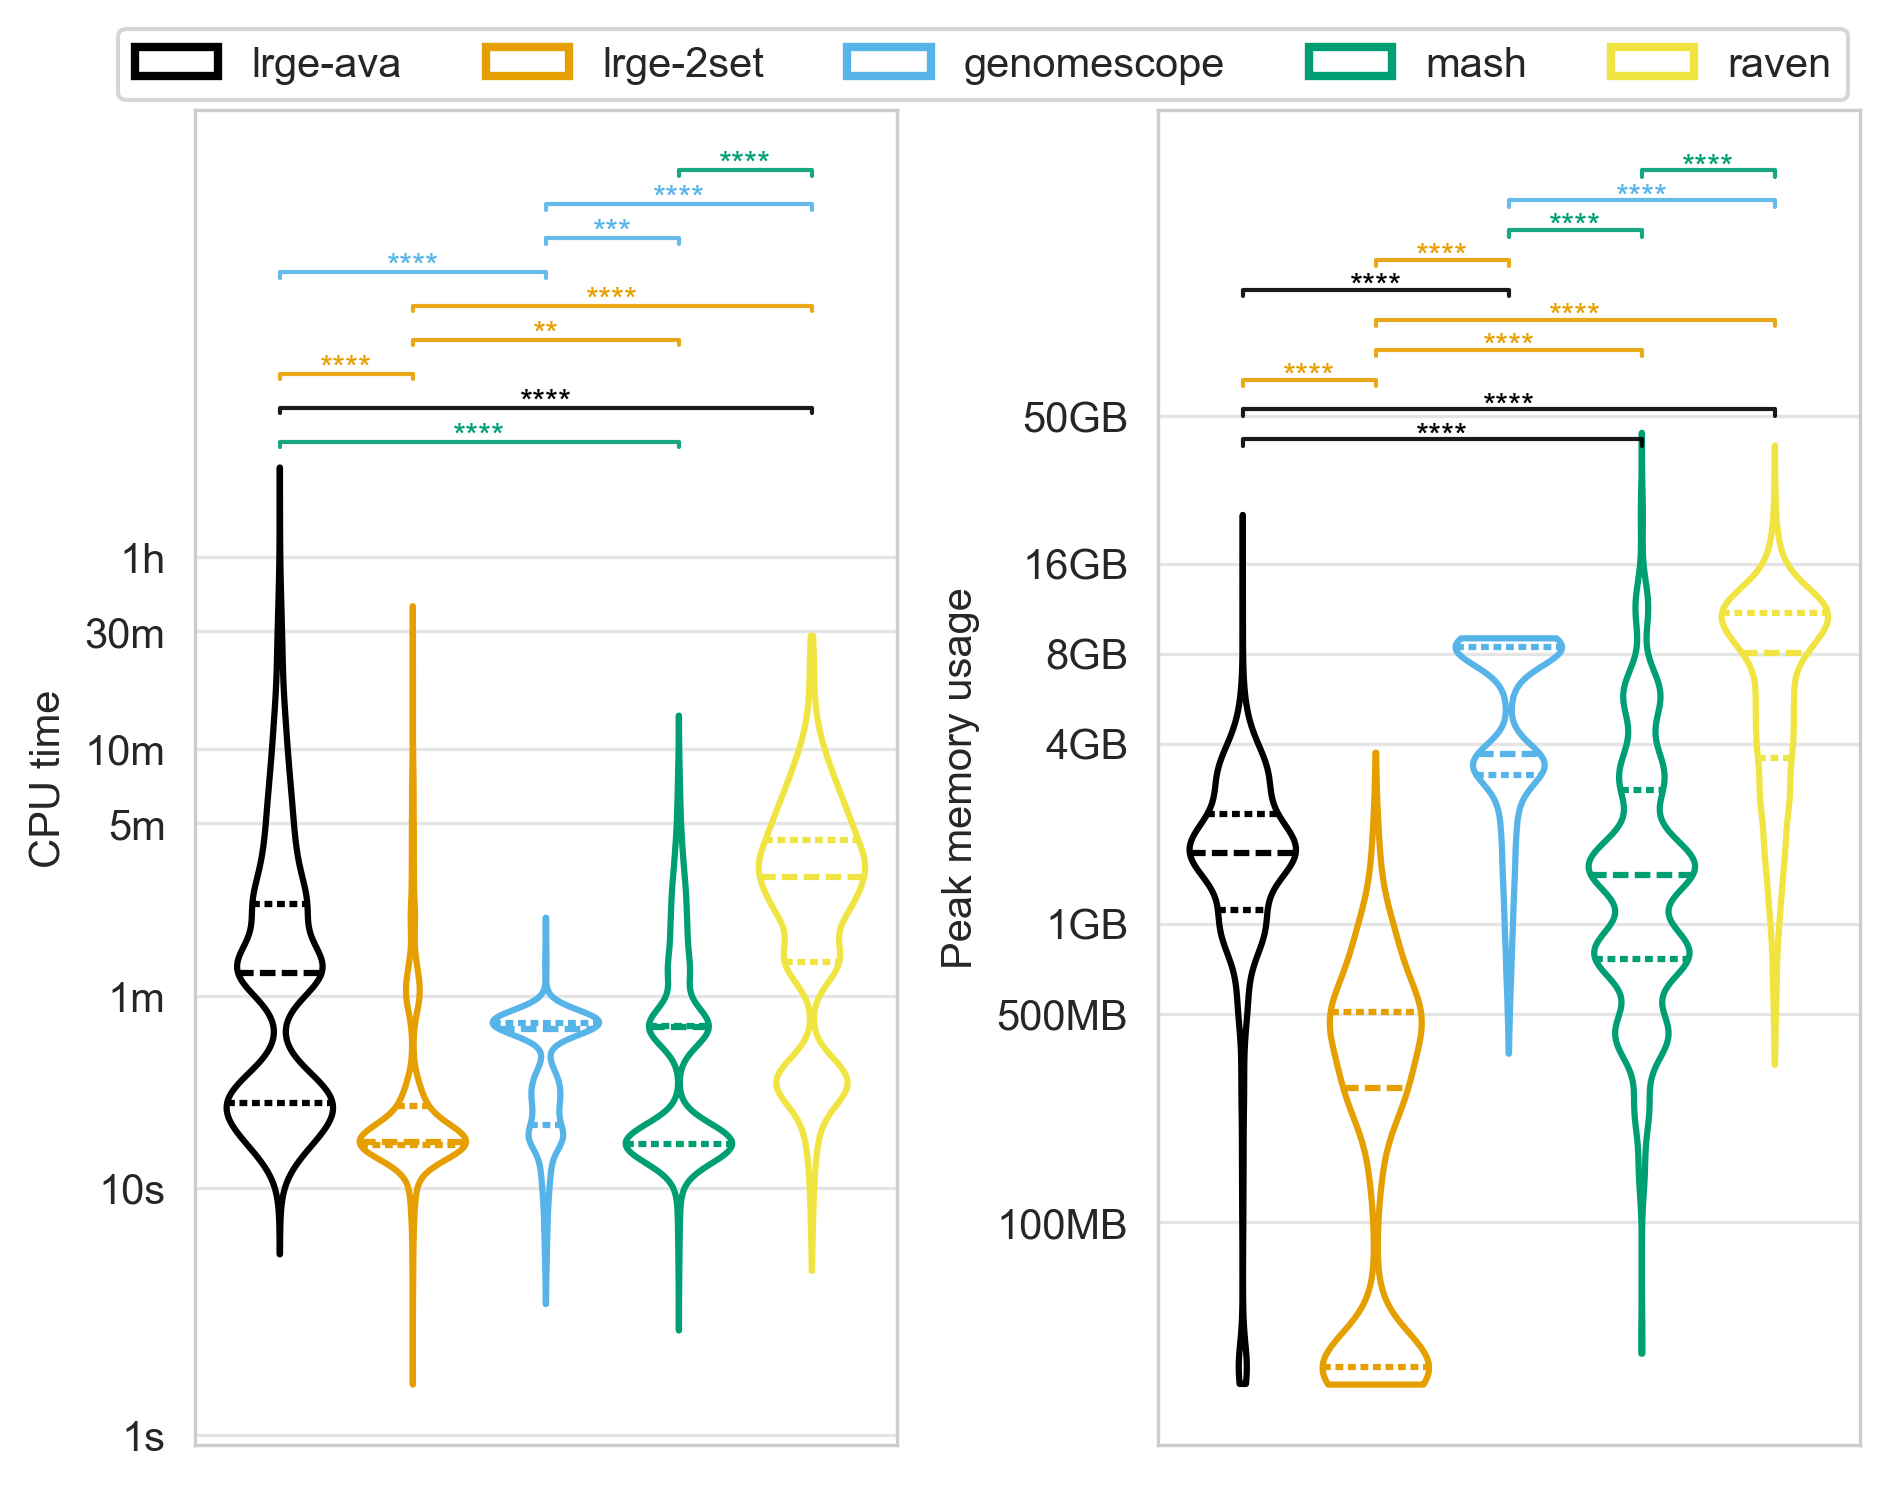

In [39]:
fig, axes = plt.subplots(dpi=300, ncols=2)
lw = 1.5
x = "method"
hue = x
y = cpu_metric

cpu_ax = axes[0]
mem_ax = axes[1]

# sns.boxenplot(x=x, y=y, data=df, ax=cpu_ax, hue=y, fill=False, lw=lw, showfliers=False)
# sns.stripplot(x=x, y=y, data=df, ax=cpu_ax, hue=hue, alpha=0.1, jitter=0.1)
sns.violinplot(
    x=x,
    y=y,
    data=df,
    ax=cpu_ax,
    hue=hue,
    fill=False,
    density_norm="width",
    cut=0,
    log_scale=True,
    gridsize=1000,
    inner="quart",
    linewidth=lw,
    legend=True,
    hue_order=order,
    order=order,
)

y = "memory_bytes"
# sns.boxenplot(x=x, y=y, data=df, ax=mem_ax, hue=y, fill=False, lw=lw, showfliers=False)
sns.violinplot(
    x=x,
    y=y,
    data=df,
    ax=mem_ax,
    hue=hue,
    fill=False,
    density_norm="width",
    cut=0,
    log_scale=True,
    gridsize=1000,
    inner="quart",
    linewidth=lw,
    hue_order=order,
    order=order,
)
# sns.stripplot(x=x, y=y, data=df, ax=mem_ax, hue=y, alpha=0.1, jitter=0.05)

# cpu_ax.set_xscale("log")
if cpu_metric != "s/Mbp":
    cpu_xticklabels = ["1s", "10s", "1m", "5m", "10m", "30m", "1h"]
    cpu_xticks = [parse_time(label) for label in cpu_xticklabels]
    logspace_min = 4
    logspace_max = 5.1
else:
    cpu_xticklabels = ["0.1", "1", "10", "100", "1000"]
    cpu_xticks = [float(label) for label in cpu_xticklabels]
    logspace_min = 1
    logspace_max = 2.1
cpu_ax.set_yticks(cpu_xticks)
cpu_ax.set_yticklabels(cpu_xticklabels)
ylabel = "sec/Mbp" if cpu_metric == "s/Mbp" else "CPU time"
cpu_ax.set_ylabel(ylabel)
cpu_ax.set_xlabel("")
# rotate the x-axis labels
cpu_ax.set_xticklabels([])
# turn on y-axis grid
cpu_ax.yaxis.grid(True)
# increase the transparency of the grid
cpu_ax.yaxis.grid(alpha=0.5)

# add stats annotations
args = []
for i, (m1, m2, pval, lowest) in enumerate(cpu_annotations):
    x1 = order.index(m1)
    x2 = order.index(m2)
    col_ix = order.index(lowest)
    col = cud_palette[col_ix]
    annot = pvalue_to_asterisks(pval)
    args.append((x1, x2, col, annot))

annot_ys = np.logspace(logspace_min, logspace_max, num=len(cpu_annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.05 * bracket_y
    cpu_ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
        alpha=0.9,
    )
    cpu_ax.text(
        (x1 + x2) * 0.5,
        bracket_y * 0.95,
        annot,
        ha="center",
        va="bottom",
        color=col,
        fontsize=8,
    )


# mem_ax.set_xscale("log")
mem_xticklabels = ["10MB", "100MB", "500MB", "1GB", "4GB", "8GB", "16GB", "50GB"]
mem_xticks = [parse_size(label) for label in mem_xticklabels]
mem_ax.set_yticks(mem_xticks)
mem_ax.set_yticklabels(mem_xticklabels)
mem_ax.set_ylabel("Peak memory usage")
mem_ax.set_xlabel("")
# rotate the x-axis labels
mem_ax.set_xticklabels([])
# turn on y-axis grid
mem_ax.yaxis.grid(True)
# increase the transparency of the grid
mem_ax.yaxis.grid(alpha=0.5)

# add stats annotations
args = []
for i, (m1, m2, pval, lowest) in enumerate(mem_annotations):
    x1 = order.index(m1)
    x2 = order.index(m2)
    col_ix = order.index(lowest)
    col = cud_palette[col_ix]
    annot = pvalue_to_asterisks(pval)
    args.append((x1, x2, col, annot))

annot_ys = np.logspace(10.6, 11.5, num=len(mem_annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.05 * bracket_y
    mem_ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
        alpha=0.9,
    )
    mem_ax.text(
        (x1 + x2) * 0.5,
        bracket_y * 0.95,
        annot,
        ha="center",
        va="bottom",
        color=col,
        fontsize=8,
    )

# make a figure level legend
handles, labels = cpu_ax.get_legend_handles_labels()
# make the lines in the legend larger
for handle in handles:
    handle.set_linewidth(2)
fig.legend(
    handles,
    labels,
    loc="center",
    bbox_to_anchor=(0.52, 1),
    ncol=len(order),
    title="",
    alignment="center",
)

cpu_ax.legend().remove()

fig.tight_layout()

In [40]:
df.groupby(["method"])[cpu_metric].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
genomescope,3370.0,33.646208,15.875742,3.39,18.0000,44.025,46.7200,124.44
lrge-2set,3370.0,37.522424,92.324840,1.60,14.9600,15.420,21.5550,2274.23
lrge-ava,3370.0,165.218255,371.308308,5.39,22.0625,74.325,141.3675,8281.97
mash,3370.0,53.573769,67.910551,2.65,15.1500,44.710,45.4825,819.47
raven,3370.0,204.854193,201.619538,4.62,82.1450,181.050,257.1375,1722.99


In [41]:
df.groupby(["method"])["memory_mb"].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
genomescope,3370.0,5104.469445,2768.264757,350.08,3008.4350,3535.375,8068.7450,8600.10
lrge-2set,3370.0,341.609504,364.811845,27.32,31.2500,268.165,482.6450,3562.81
lrge-ava,3370.0,1795.549196,1119.334029,27.46,1055.6325,1641.540,2213.4325,22263.66
mash,3370.0,2108.934187,2771.541675,34.68,727.5350,1392.160,2679.5375,41923.57
raven,3370.0,7186.894481,4258.810826,321.22,3418.9625,7687.785,10452.8625,38001.59


Look at the relationship between average read quality and the relative error

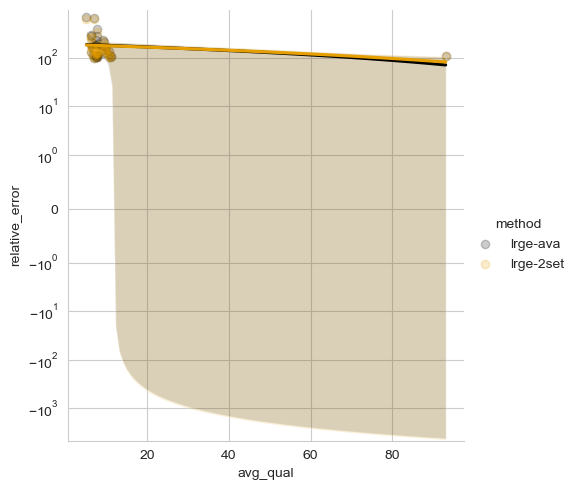

In [61]:
x = "avg_qual"
y = "relative_error"
style = "platform"
hue = "method"
data = df.query("avg_qual > 0 and method in ['lrge-ava', 'lrge-2set'] and relative_error > 100")
# fig, ax = plt.subplots(dpi=300)
# sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)
g = sns.lmplot(x=x, y=y, hue=hue, data=data, palette=cud_palette, scatter_kws={"alpha": 0.2})
ax = g.axes[0, 0]
# yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000]
ax.set_yscale("symlog", linthresh=1)
# ax.set_yticks(yticks)
# ax.set_yticklabels(yticks)
# ax.set_xscale("log")

# make the markers larger and less transparent in the legend
# handles, labels = ax.get_legend_handles_labels()
# for handle in handles:
#     handle.set_markersize(7)
#     handle.set_alpha(1)

# ax.legend(
#     handles,
#     labels,
#     loc="lower center",
#     bbox_to_anchor=(0.5, 1),
#     ncol=4,
#     title="",
#     alignment="center",
#     handletextpad=0.1,
# )